In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scikit-learn tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
import sklearn.metrics

# Our logistic regression package
from logistic_regression import LogisticRegression


Load the Spambase dataset

In [2]:
data = pd.read_csv('Data/spambase.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The data contains 57 features and a binary class label (spam vs not spam)

As the values appear to all be positive frequences, we us sklearn's standard rescaler

In [3]:
scaled_data = StandardScaler().fit_transform(data.drop('class', axis=1))
X = np.array(scaled_data)
y = np.array(data['class'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
# We tighten the convergence tolerance to exaggerate the overfitting
LR_params = {'tol':1E-9, 'stepsize':3E0, 'iters':2E5}

LR = LogisticRegression(**LR_params, ld=0)
history = LR.fit(X_train, y_train, valid_X=X_test, valid_y=y_test)

# accuracy score is (TP+TN) / (TP +TN + FP + FN)

acc = sklearn.metrics.accuracy_score(LR.predict(X_test), y_test)
print("Test accuracy: {:0.5f}".format(acc))

Iter: 22514, Cost: 0.22208 Converged in 22515 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Test accuracy: 0.92876


We fit a logistic regression model onto the data and calculate the validation accuracy

In [6]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, LR.predict(X_test))
print(confusion_matrix)

[[665  32]
 [ 50 404]]


In [7]:
# precision is pre = TP / (TP + FP)
pre = sklearn.metrics.precision_score(y_test, LR.predict(X_test))
# recall is rec = TP / (TP + FN)
rec = sklearn.metrics.recall_score(y_test, LR.predict(X_test))

print("Precision: {:0.3f}".format(pre))
print("Recall: {:0.3f}".format(rec))

Precision: 0.927
Recall: 0.890


In [8]:
# F1 score: (2 * pre  * rec) / (pre + rec)
f1_score = sklearn.metrics.f1_score(y_test, LR.predict(X_test))
print('F1 Score: {:0.3f}'.format(f1_score))

F1 Score: 0.908


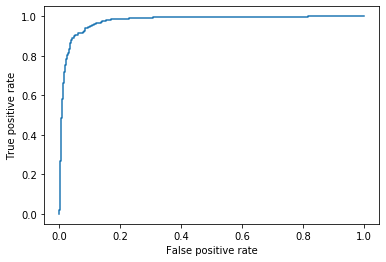

In [9]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, LR.predict_proba(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

A beautiful ROC curve! 

# Regularization

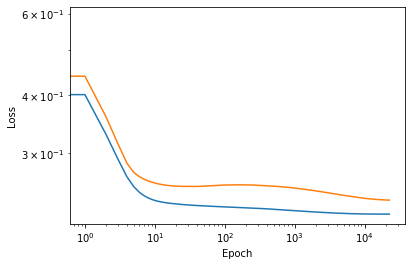

In [10]:
plt.loglog(history['training_loss'])
plt.loglog(history['validation_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

We appear to be overfitting. Let's see if we can improve the classification accuracy with regularization! 

In [11]:
LR_regularized = LogisticRegression(ld=0.01, **LR_params)
history_regularized = LR_regularized.fit(X_train, y_train, valid_X=X_test, valid_y=y_test)

Iter: 130, Cost: 0.24597 Converged in 131 iterations!


In [12]:
acc = sklearn.metrics.accuracy_score(LR_regularized.predict(X_test), y_test)
pre = sklearn.metrics.precision_score(y_test, LR_regularized.predict(X_test))
rec = sklearn.metrics.recall_score(y_test, LR_regularized.predict(X_test))

print("Test accuracy: {:0.3f}".format(acc))
print("Precision: {:0.3f}".format(pre))
print("Recall: {:0.3f}".format(rec))

print(sklearn.metrics.confusion_matrix(y_test, LR_regularized.predict(X_test)))

Test accuracy: 0.922
Precision: 0.917
Recall: 0.881
[[661  36]
 [ 54 400]]


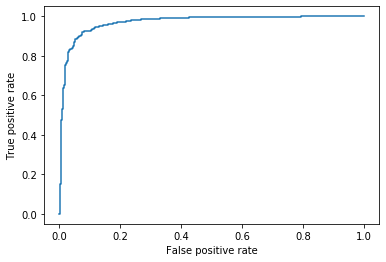

In [13]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, LR_regularized.predict_proba(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

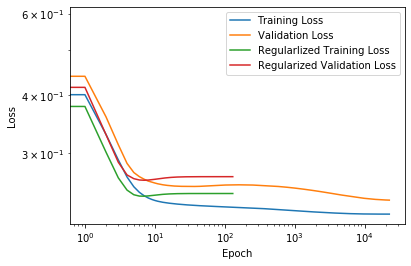

In [14]:
plt.loglog(history['training_loss'])
plt.loglog(history['validation_loss'])
plt.loglog(history_regularized['training_loss'])
plt.loglog(history_regularized['validation_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(('Training Loss', 'Validation Loss', 'Regularlized Training Loss', 'Regularized Validation Loss'))
plt.show()

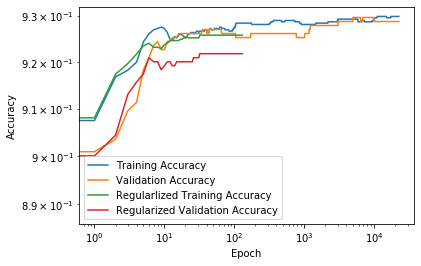

In [15]:
plt.loglog(history['training_acc'])
plt.loglog(history['validation_acc'])
plt.loglog(history_regularized['training_acc'])
plt.loglog(history_regularized['validation_acc'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(('Training Accuracy', 'Validation Accuracy', 'Regularlized Training Accuracy', 'Regularized Validation Accuracy'))

plt.show()

In [16]:
def splits(nsplits, X, y):
    """
    # TODO add docstring
    """
    X_folds = []
    y_folds = []
    
    X = np.array(X)
    y = np.array(y)


    shuffled_indices = np.random.permutation(range(len(y)))
    split_indices = np.array_split(shuffled_indices, nsplits)
    
    for fold in split_indices:
        X_folds.append(X[fold])
        y_folds.append(y[fold])
    
    return X_folds, y_folds


def kfold(Classifier, X, y, n_splits=5, metric=sklearn.metrics.accuracy_score, verbose=False, params={}, **kwargs):
    """
    # TODO add docstring
    """
    scores = []
    
    X_folds, y_folds = splits(n_splits, X, y)
    for i in range(n_splits):
        X_train = X_folds
        y_train = y_folds
                
        X_test = X_train.pop(0)
        y_test = y_train.pop(0)
        
        # Not sure why these have inconsistant dimesnions?
        X_train = np.vstack(X_train)
        y_train = np.hstack(y_train)
        
        classifier = Classifier(**params)
        classifier.fit(X_train, y_train, **kwargs)
        
        predictions = classifier.predict(X_test)
        scores.append(metric(y_test, predictions))
        X_folds.append(X_test)
        y_folds.append(y_test)
    return np.mean(scores), np.std(scores)
  
    

In [17]:
# Caution: this cell has a long execution timem

scores = []
errors = []
values = np.logspace(-16, -2, 8)
for value in values:
    mean, std = kfold(LogisticRegression, X, y, n_splits=20, params={**LR_params, 'ld':value}, verbose=False)
    scores.append(mean)
    errors.append(errors)

Iter: 26444, Cost: 0.22062 Converged in 26445 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Iter: 26753, Cost: 0.21683 Converged in 26754 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                             

Iter: 27494, Cost: 0.21972 Converged in 27495 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Iter: 27161, Cost: 0.21880 Converged in 27162 iterations!                                                                                                                                                                                                                                                     

Iter: 29102, Cost: 0.21105 Converged in 29103 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
Iter: 27162, Cost: 0.22110 Converged in 27163 iterations!                                                                                                                                                                                                                                                                                                                                                                 

Iter: 26244, Cost: 0.21963 Converged in 26245 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Iter: 39439, Cost: 0.21633 Converged in 39440 iterations!                                                                                        

Iter: 27223, Cost: 0.22024 Converged in 27224 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Iter: 37633, Cost: 0.21472 Converged in 37634 iterations!                                                                                     

Iter: 26849, Cost: 0.21921 Converged in 26850 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Iter: 47026, Cost: 0.21634 Converged in 47027 iterations!                                                                                                                                                                                                                

Iter: 26734, Cost: 0.22326 Converged in 26735 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Iter: 26739, Cost: 0.21564 Converged in 26740 iterations!                                                                                                                                                                                                                                                                                  

Iter: 27168, Cost: 0.21564 Converged in 27169 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Iter: 26037, Cost: 0.21536 Converged in 26038 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                    

Iter: 26498, Cost: 0.22014 Converged in 26499 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Iter: 25831, Cost: 0.21731 Converged in 25832 iterations!                                                                                                                                                                                                                                                                                                                                                                               
Iter: 29034, Cost: 0.21868 Converged in 2

Iter: 33187, Cost: 0.21846 Converged in 33188 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
Iter: 31994, Cost: 0.21735 Converged in 31995 iterations!                                                                                                                                                                   

Iter: 31822, Cost: 0.22092 Converged in 31823 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Iter: 32235, Cost: 0.21957 Converged in 32236 iterations!                                                                                                

Iter: 31600, Cost: 0.21684 Converged in 31601 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Iter: 7810, Cost: 0.22072 Converged in 7811 iterations!                                                                                                      

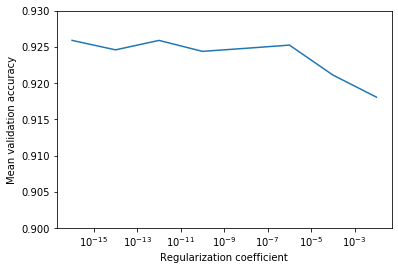

In [18]:
plt.semilogx(values, scores)
plt.xlabel('Regularization coefficient')
plt.ylabel('Mean validation accuracy')
plt.ylim((0.9, 0.93))
plt.show()

We repeat the above plots with our optimized parameter value

In [19]:
LR_regularized = LogisticRegression(ld=1E-9, **LR_params)
history_regularized = LR_regularized.fit(X_train, y_train, valid_X=X_test, valid_y=y_test)

Iter: 22519, Cost: 0.22208 Converged in 22520 iterations!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             


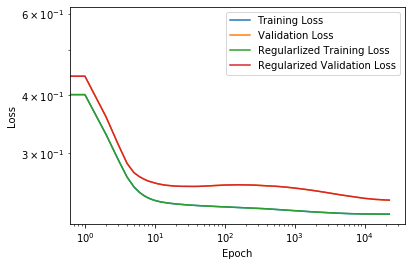

In [20]:
plt.loglog(history['training_loss'])
plt.loglog(history['validation_loss'])
plt.loglog(history_regularized['training_loss'])
plt.loglog(history_regularized['validation_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(('Training Loss', 'Validation Loss', 'Regularlized Training Loss', 'Regularized Validation Loss'))
plt.show()

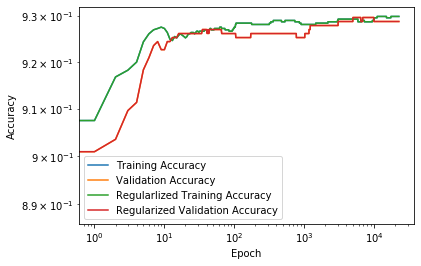

In [21]:
plt.loglog(history['training_acc'])
plt.loglog(history['validation_acc'])
plt.loglog(history_regularized['training_acc'])
plt.loglog(history_regularized['validation_acc'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(('Training Accuracy', 'Validation Accuracy', 'Regularlized Training Accuracy', 'Regularized Validation Accuracy'))

plt.show()